In [16]:
import torch as tc
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [153]:
a=tc.load("复振幅5.pth")

In [154]:
#单边带编码
w,h=a.size()
a_f=tc.fft.fft2(a)
a_f[0:int(w/2)]=0
# a_f[int(w/2):w]=0
a_if=tc.fft.ifft2(a_f)

In [155]:
%matplotlib inline
b=np.array(a_if)#a_if
abs_b=np.abs(b)
angle_b=np.angle(b)
abs_b=abs_b/np.max(abs_b)

(-0.5, 1023.5, 767.5, -0.5)

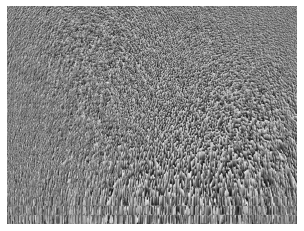

In [156]:
plt.imshow(angle_b,"gray")
plt.axis("off")

In [157]:
pixl=0.8*10**-2#mm
w_mesh=np.linspace(-(w/2-1/2)*pixl,(w/2-1/2)*pixl,w)
h_mesh=np.linspace(-(h/2-1/2)*pixl,(h/2-1/2)*pixl,h)
[x0,y0]=np.meshgrid(w_mesh,h_mesh)#x0沿竖直方向
lamda=5.32*10**-4
theta=1/180*np.pi*0
fx=-np.sin(theta)/lamda
T=1/2*(1+abs_b*np.cos(2*np.pi*fx*y0.T-angle_b))

In [158]:
# np.save("无随机相位全息图(圆锥)",T)

(-0.5, 1023.5, 767.5, -0.5)

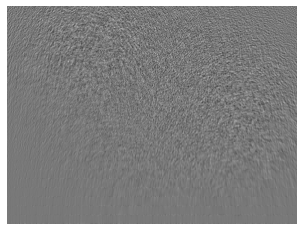

In [159]:
plt.imshow(T,"gray")
plt.axis("off")

In [160]:
T_f=np.fft.fft2(T)
T_f[0:int(w/2)]=0
# T_f[int(w/2):w]=0
T_ff=np.fft.fft2(T_f)
# plt.hist(T_ff.reshape(-1))

(-0.5, 1023.5, 767.5, -0.5)

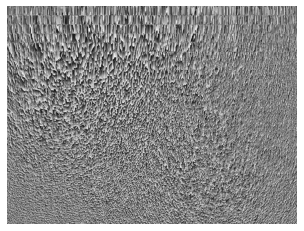

In [161]:
plt.imshow(np.angle(T_ff),"gray")
plt.axis("off")

(-0.5, 1023.5, 767.5, -0.5)

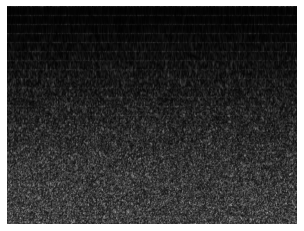

In [162]:
plt.imshow(np.abs(T_ff)/np.max(np.abs(T_ff)),"gray")
plt.axis("off")

In [163]:
n=1
r,c=n*w,n*h
T_1=np.pad(T_ff,((int((r-T.shape[0])/2),int((r-T.shape[0])/2)),(int((c-T.shape[1])/2),int((c-T.shape[1])/2))))

In [165]:
#D-FFT
u=np.linspace(-1/(2*(r-1)*pixl),1/(2*(r-1)*pixl),r)*r
v=np.linspace(-1/(2*(c-1)*pixl),1/(2*(c-1)*pixl),c)*c
[u,v]=np.meshgrid(u,v)
x=np.linspace(-(r/2-1/2)*pixl,(r/2-1/2)*pixl,r)
y=np.linspace(-(c/2-1/2)*pixl,(c/2-1/2)*pixl,c)
[x,y]=np.meshgrid(x,y)
k=2*np.pi/lamda
# for i in range(4):
d=-250
H=np.exp(1j*k*d*(1-lamda**2*(u.T**2+v.T**2)/2))
U_f=np.fft.fftshift(np.fft.fft2(T_1*np.exp(-1j*2*np.pi*fx*y.T)))#*np.exp(-1j*2*np.pi*fx*y.T)
U=np.fft.ifft2(U_f*H)
I=np.abs(U)#**2
# plt.subplot(2,2,i+1)
# plt.imshow(I,"gray")
import cv2 as cv
window_name="show"
# I=np.abs(T_ff)
cv.namedWindow(window_name,0)
cv.setWindowProperty(window_name,cv.WND_PROP_FULLSCREEN,cv.WINDOW_FULLSCREEN)
cv.moveWindow(window_name,0,0)
cv.resizeWindow(window_name,h,w)
image=(I-np.min(I))/(np.max(I)-np.min(I))
cv.imshow(window_name,image)#np.flip(np.flip(image,0),1)
cv.waitKey(0)

-1

In [166]:
%matplotlib auto
for i in range(4):
    d=-(220+30*i)
#     d=-150
    H=np.exp(1j*k*d*(1-lamda**2*(u.T**2+v.T**2)/2))
    U_f=np.fft.fftshift(np.fft.fft2(T_1*np.exp(-1j*2*np.pi*fx*y.T)))#*np.exp(-1j*2*np.pi*fx*x0.T)
    U=np.fft.ifft2(U_f*H)
    I=np.abs(U)#**2
    plt.subplot(2,2,i+1)
    plt.imshow(I,"gray")
    plt.xlabel("d={}".format(d))

Using matplotlib backend: Qt5Agg


In [49]:
%matplotlib auto
thet=1/180*np.pi*np.array([-1.5,-0.5,0.5,1.5])
f=np.sin(thet)/lamda
for i in range(len(thet)):
    T_f=np.fft.fft2(T*np.exp(1j*2*np.pi*f[i]*y0.T))
    T_f[0:int(w/2)]=0
    T_ff=np.fft.fft2(T_f)
    d=-180
    H=np.exp(1j*k*d*(1-lamda**2*(u.T**2+v.T**2)/2))
    U_f=np.fft.fftshift(np.fft.fft2(T_ff))
    U=np.fft.ifft2(U_f*H)
    I=np.abs(U)#**2
    plt.subplot(2,2,i+1)
    plt.imshow(I,"gray")
    plt.xlabel(r"$\theta$={}".format(thet[i]))

Using matplotlib backend: Qt5Agg


In [106]:
plt.imshow(I,"gray")
plt.axis("off")

(-0.5, 2047.5, 1023.5, -0.5)

In [29]:
import cv2 as cv
window_name="show"
# I=np.abs(T_ff)
cv.namedWindow(window_name,0)
cv.setWindowProperty(window_name,cv.WND_PROP_FULLSCREEN,cv.WINDOW_FULLSCREEN)
cv.moveWindow(window_name,100,50)
cv.resizeWindow(window_name,1024,768)
image=(I-np.min(I))/(np.max(I)-np.min(I))
cv.imshow(window_name,image)#np.flip(np.flip(image,0),1)
cv.waitKey(0)

-1

In [271]:
# cv.imwrite("danbianhoujiao.png",np.abs(T_ff)/np.max(np.abs(T_ff))*255)

True

In [13]:
cv.destroyAllWindows()

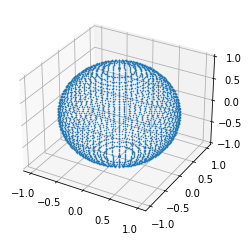

In [207]:
N=60
plt.figure().gca(projection='3d')
phi_l=tc.linspace(0,1-1/N,N)*2*tc.pi
cos_theta=tc.linspace(1,-1,N)
sin_theta=tc.sqrt(1-cos_theta**2)
light_dir=tc.zeros(N**2,3)
light_dir[:,0]=tc.kron(sin_theta,tc.cos(phi_l))
light_dir[:,1]=tc.kron(sin_theta,tc.sin(phi_l))
light_dir[:,2]=tc.kron(cos_theta,tc.ones(N))
light_dir=np.array(light_dir)
plt.plot(light_dir[:,0],light_dir[:,1],light_dir[:,2],".",ms=1)

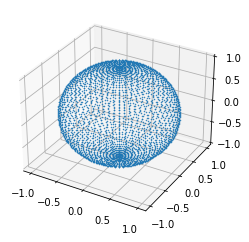

In [206]:
N=60
plt.figure().gca(projection='3d')
# plt.subplot(projection='3d')
phi_l=tc.linspace(0,1-1/N,N)*2*tc.pi
theta=tc.linspace(0,1,N)*tc.pi
light_dir=tc.zeros(N**2,3)
light_dir[:,0]=tc.kron(tc.sin(theta),tc.cos(phi_l))
light_dir[:,1]=tc.kron(tc.sin(theta),tc.sin(phi_l))
light_dir[:,2]=tc.kron(tc.cos(theta),tc.ones(N))
light_dir=np.array(light_dir)
plt.plot(light_dir[:,0],light_dir[:,1],light_dir[:,2],".",ms=1)